# Bank Customer Churn

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Data Preprocessing

In [ ]:
#Importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [ ]:
#finding null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ipython-input-174-04967c0f5f3a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True)


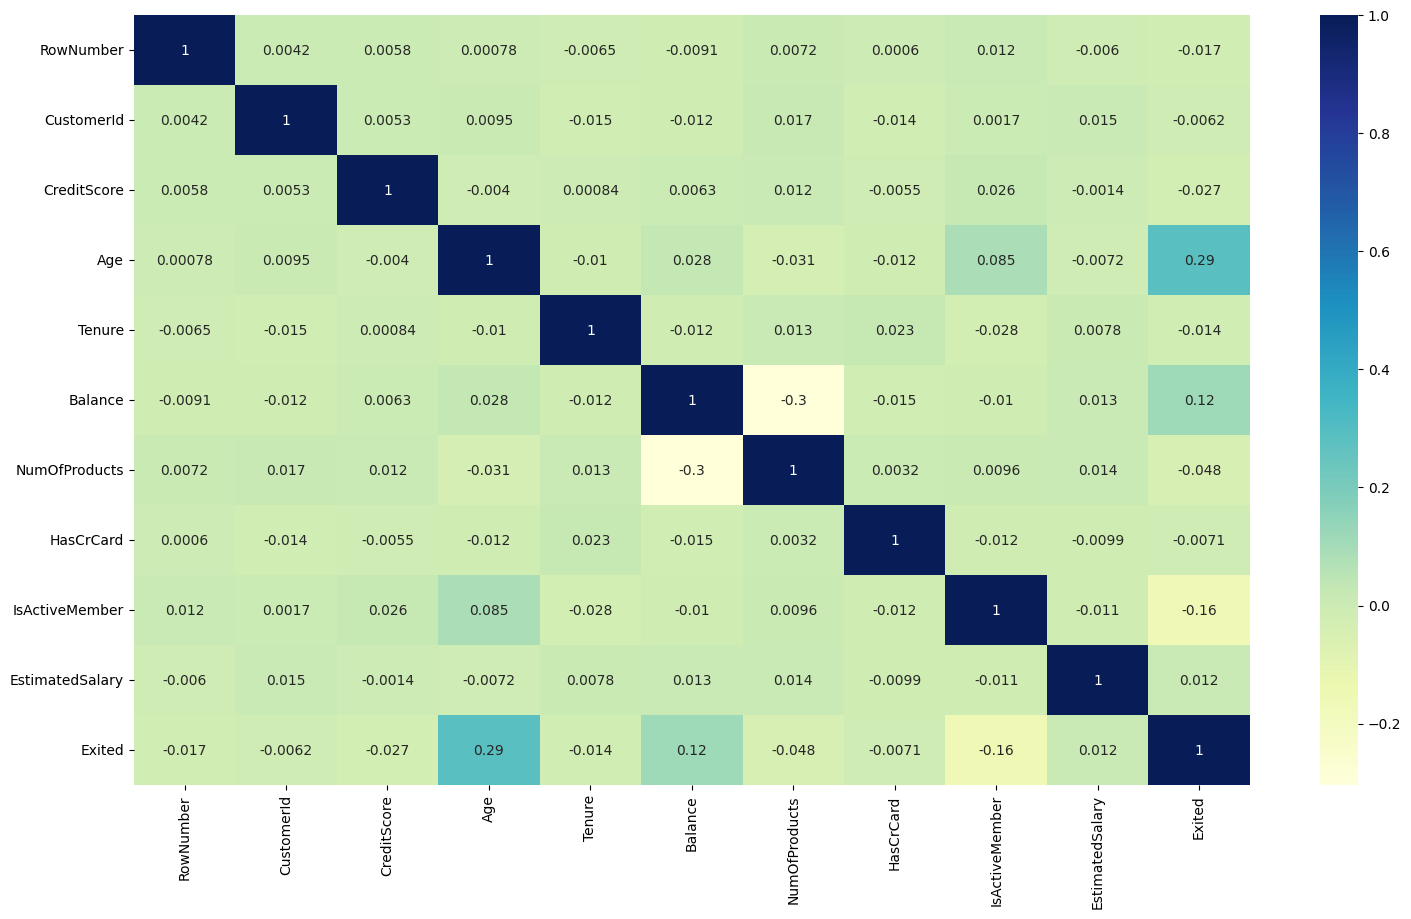

In [ ]:
#heatmap
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True)
plt.show()

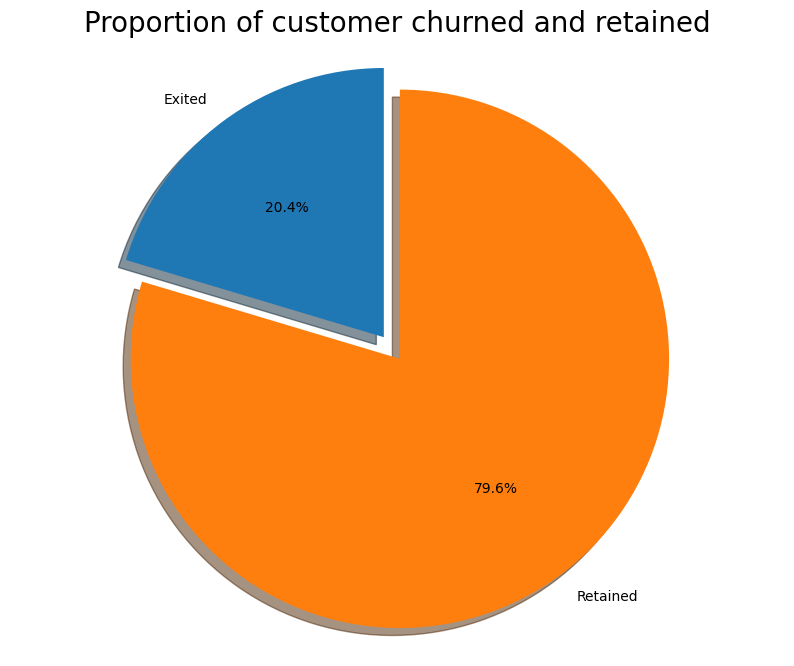

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

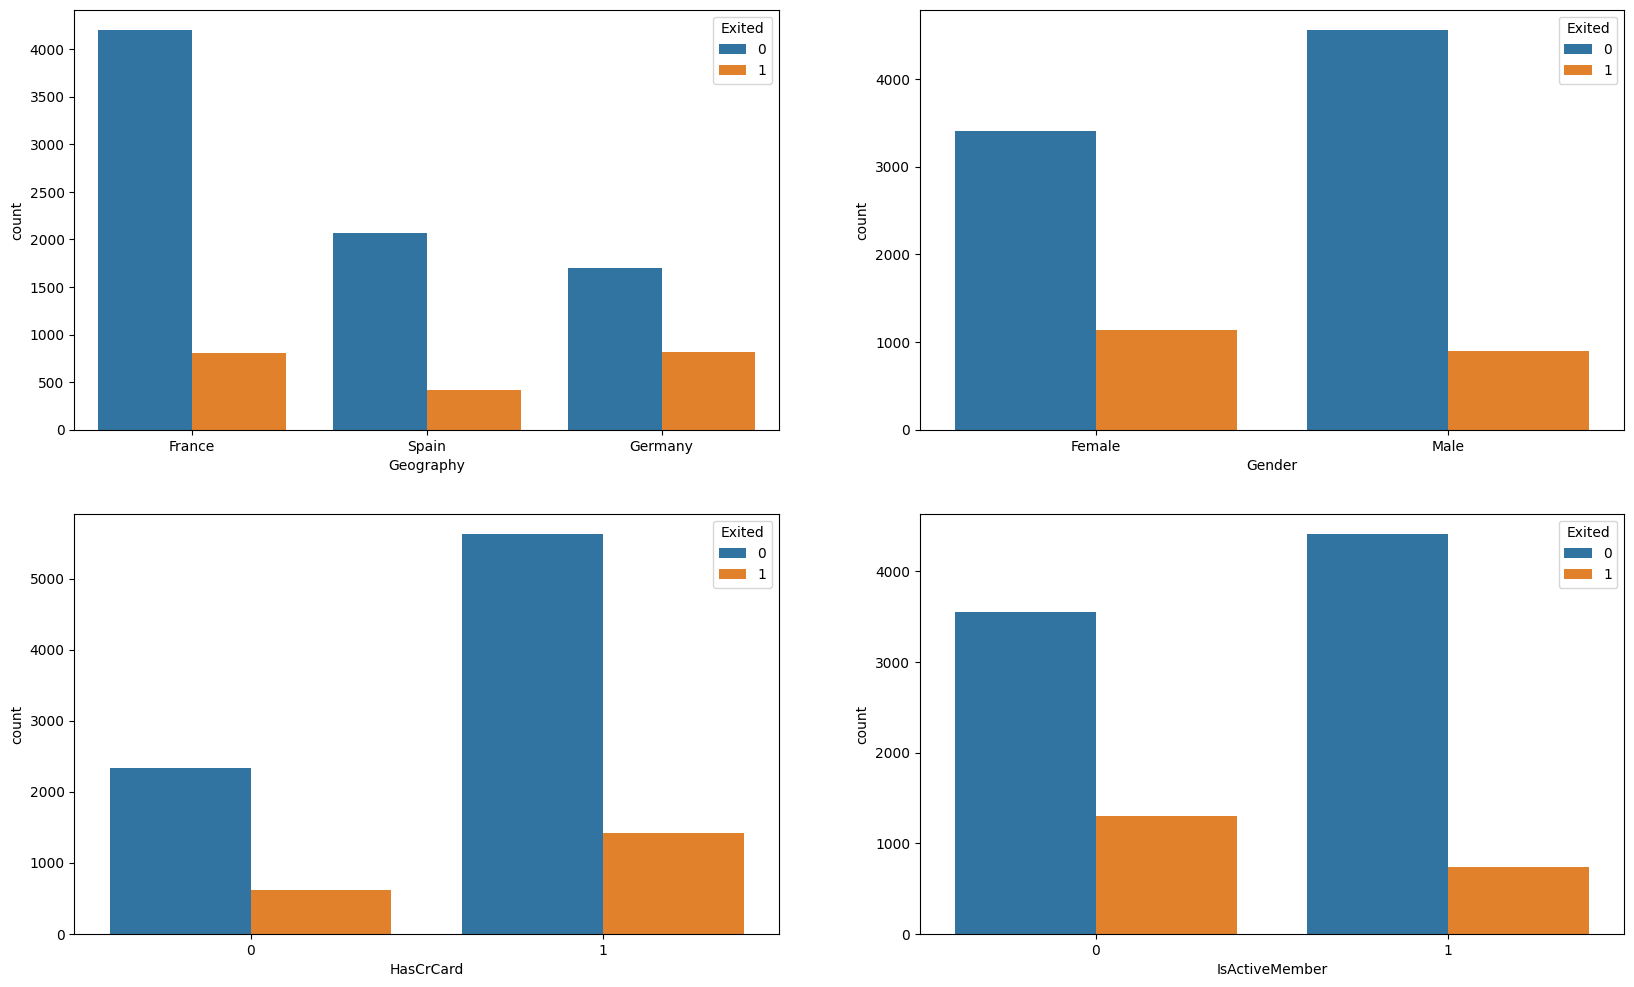

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Encoding categorical data

In [ ]:
#Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
#One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
#adding the input layer & first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

In [ ]:
#compiling the ann
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#training the ann on the training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.5871 - accuracy: 0.7904
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7963
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.7963
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7967
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8039
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8127
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8176
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8189
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8192
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3725 - accura

## Part 4 - Making the predictions and evaluating the model

In [ ]:
#predicting result of a single observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 38ms/step
[[False]]


In [ ]:
#predicting the test set result
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

79/79 [==============================] - 0s 964us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1886  105]
 [ 252  257]]


0.8572

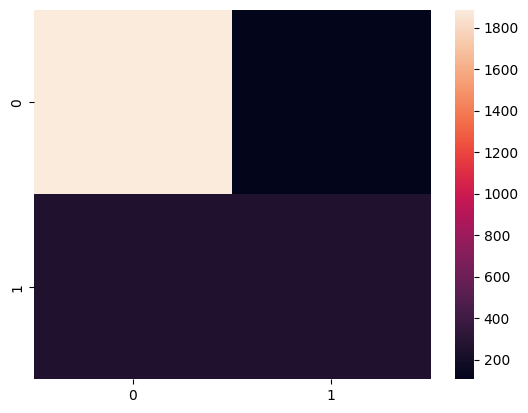

In [ ]:
sns.heatmap(cm)
plt.show()

## Comparing Ann model with others


# Kernal SVM

In [ ]:
from sklearn.svm import SVC
classifier  = SVC(kernel = 'rbf', random_state =0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
#printing single value
print(classifier.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )

[0]


In [ ]:
# predicting test set
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)
accuracy_score(y_test, y_pred)

[[1933   58]
 [ 287  222]]


0.862

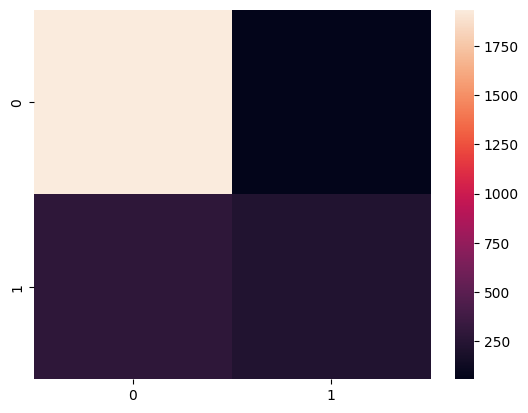

In [ ]:
sns.heatmap(cm_1)
plt.show()

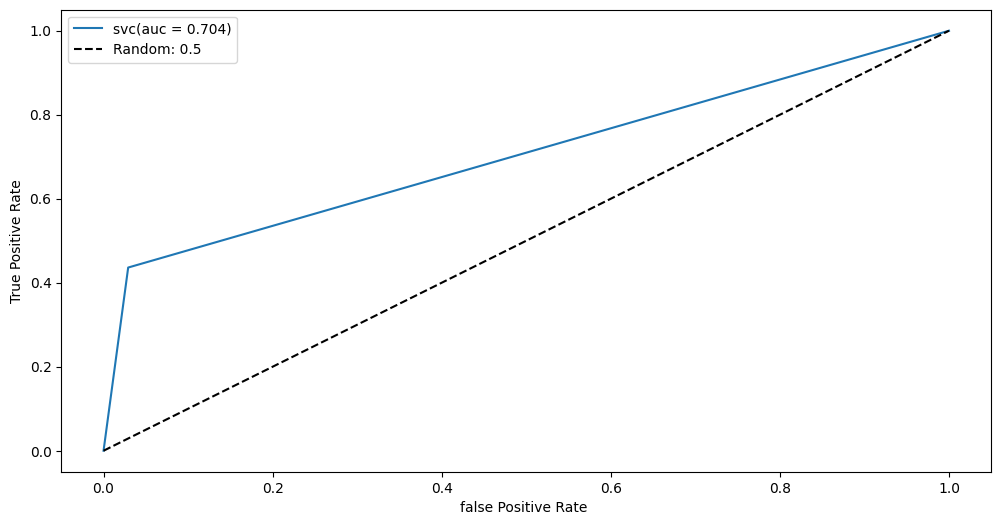

In [ ]:
from sklearn.metrics import roc_curve, auc
classifier_fpr, classifier_tpr, threshold = roc_curve(y_test, y_pred)
auc_classifier = auc(classifier_fpr, classifier_tpr)
plt.figure(figsize=(12,6),dpi=100)
plt.plot(classifier_fpr, classifier_tpr, linestyle= '-',label= 'svc(auc = %0.3f)' % auc_classifier)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')


plt.xlabel('false Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression(random_state=0)
classifier_1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#printing single value
print(classifier_1.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )

[0]


In [ ]:
# predicting test set
y_pred = classifier_1.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_2 = confusion_matrix(y_test, y_pred)
print(cm_2)
accuracy_score(y_test, y_pred)

[[1901   90]
 [ 393  116]]


0.8068

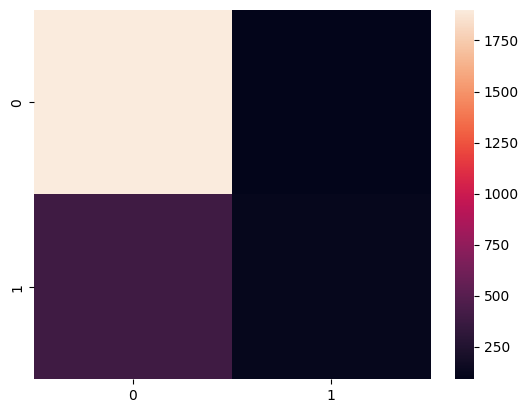

In [ ]:
sns.heatmap(cm_2)
plt.show()

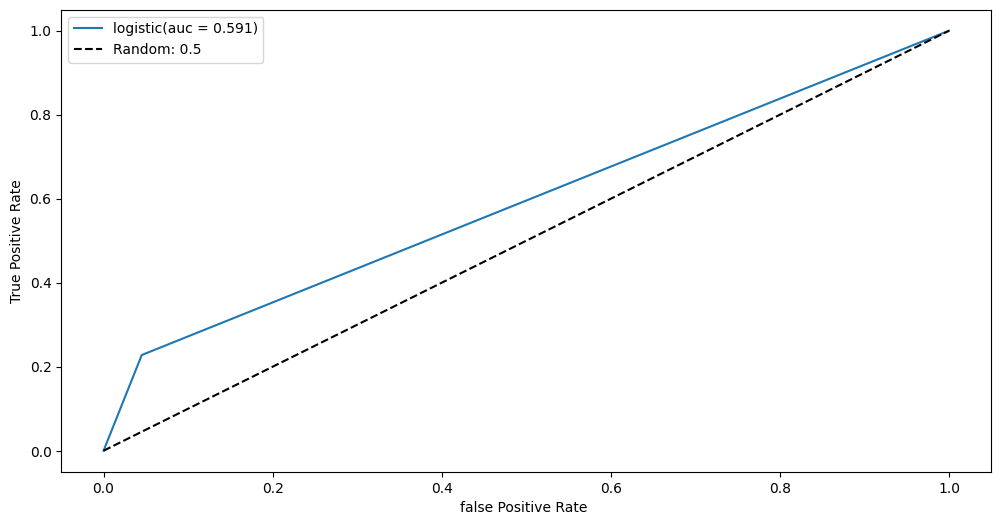

In [ ]:
from sklearn.metrics import roc_curve, auc
classifier_1_fpr, classifier_1_tpr, threshold = roc_curve(y_test, y_pred)
auc_classifier_1 = auc(classifier_1_fpr, classifier_1_tpr)
plt.figure(figsize=(12,6),dpi=100)
plt.plot(classifier_1_fpr, classifier_1_tpr, linestyle= '-',label= 'logistic(auc = %0.3f)' % auc_classifier_1)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')


plt.xlabel('false Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#printing single value
print(classifier_2.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )

[0]


In [ ]:
# predicting test set
y_pred = classifier_2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_3 = confusion_matrix(y_test, y_pred)
print(cm_3)
accuracy_score(y_test, y_pred)

[[1861  130]
 [ 298  211]]


0.8288

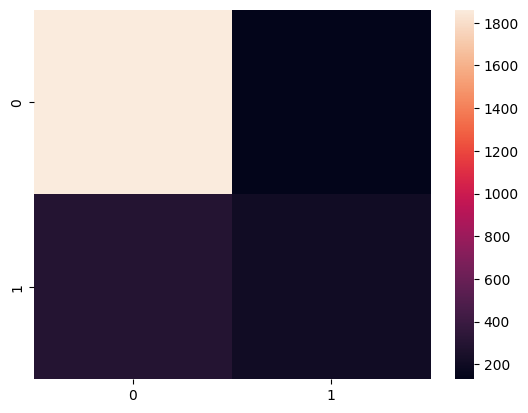

In [ ]:
sns.heatmap(cm_3)
plt.show()

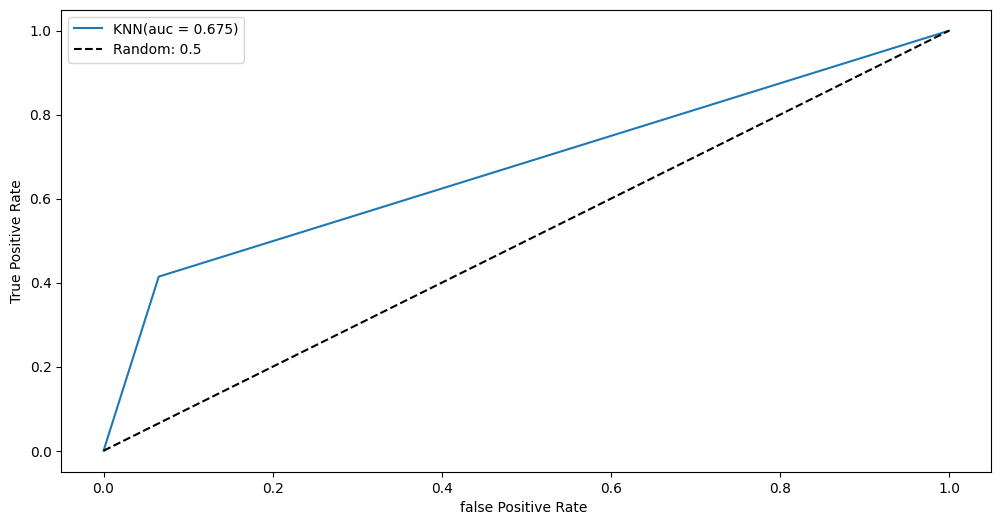

In [ ]:
from sklearn.metrics import roc_curve, auc
classifier_2_fpr, classifier_2_tpr, threshold = roc_curve(y_test, y_pred)
auc_classifier_2 = auc(classifier_2_fpr, classifier_2_tpr)
plt.figure(figsize=(12,6),dpi=100)
plt.plot(classifier_2_fpr, classifier_2_tpr, linestyle= '-',label= 'KNN(auc = %0.3f)' % auc_classifier_2)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')


plt.xlabel('false Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Random Forest Network

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state =1)
classifier_3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
#printing single value
print(classifier_3.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )

[0]


In [ ]:
# predicting test set
y_pred = classifier_3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_4 = confusion_matrix(y_test, y_pred)
print(cm_4)
accuracy_score(y_test, y_pred)

[[1912   79]
 [ 269  240]]


0.8608

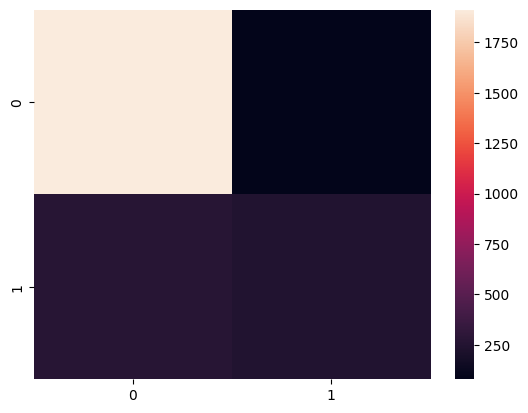

In [ ]:
sns.heatmap(cm_4)
plt.show()

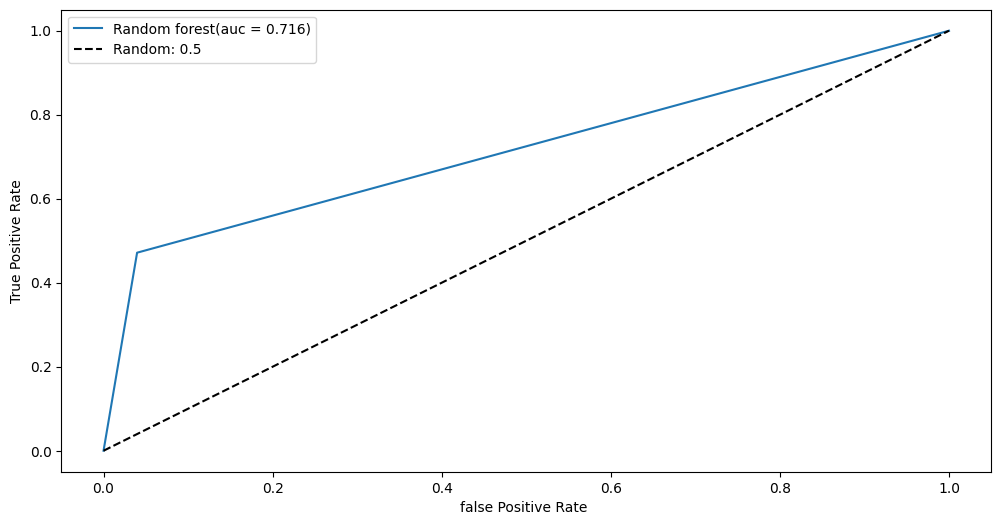

In [ ]:
from sklearn.metrics import roc_curve, auc
classifier_3_fpr, classifier_3_tpr, threshold = roc_curve(y_test, y_pred)
auc_classifier_3 = auc(classifier_3_fpr, classifier_3_tpr)
plt.figure(figsize=(12,6),dpi=100)
plt.plot(classifier_3_fpr, classifier_3_tpr, linestyle= '-',label= 'Random forest(auc = %0.3f)' % auc_classifier_3)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')


plt.xlabel('false Positive Rate ')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# K-Flod Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.29 %
Standard Deviation: 0.85 %
